In [1]:

import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from Functions import *
import math as math
from scipy import signal
import cv2 as cv
%matplotlib inline

2.1.1

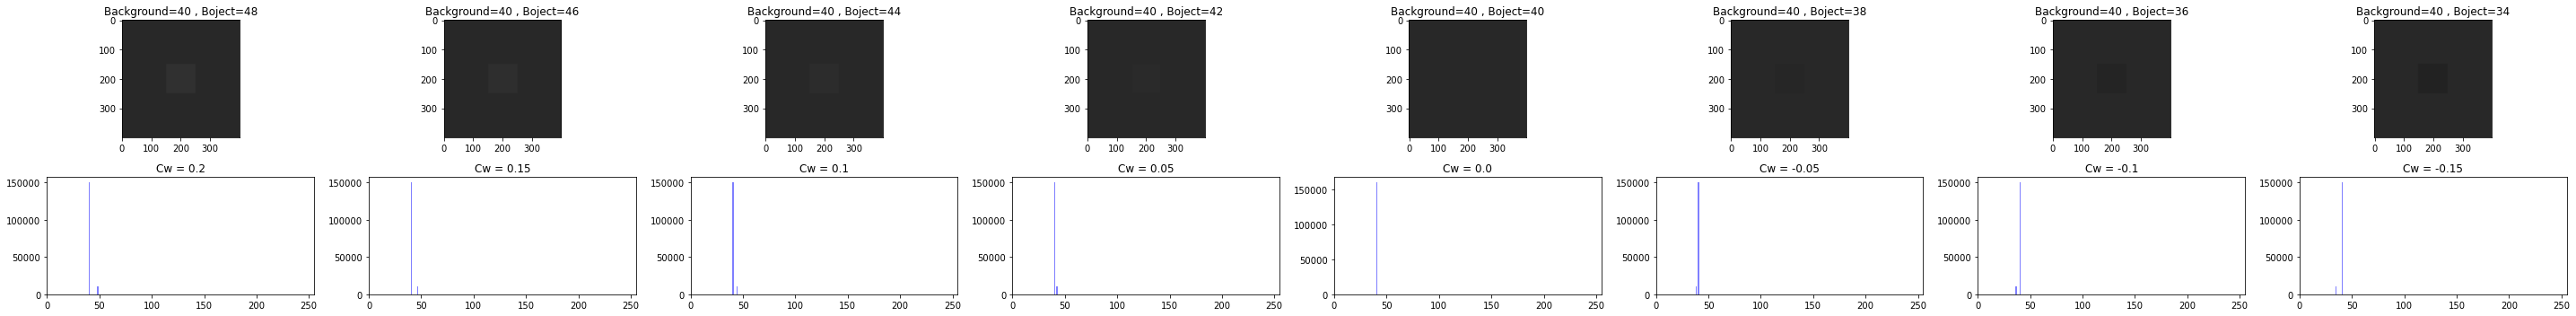

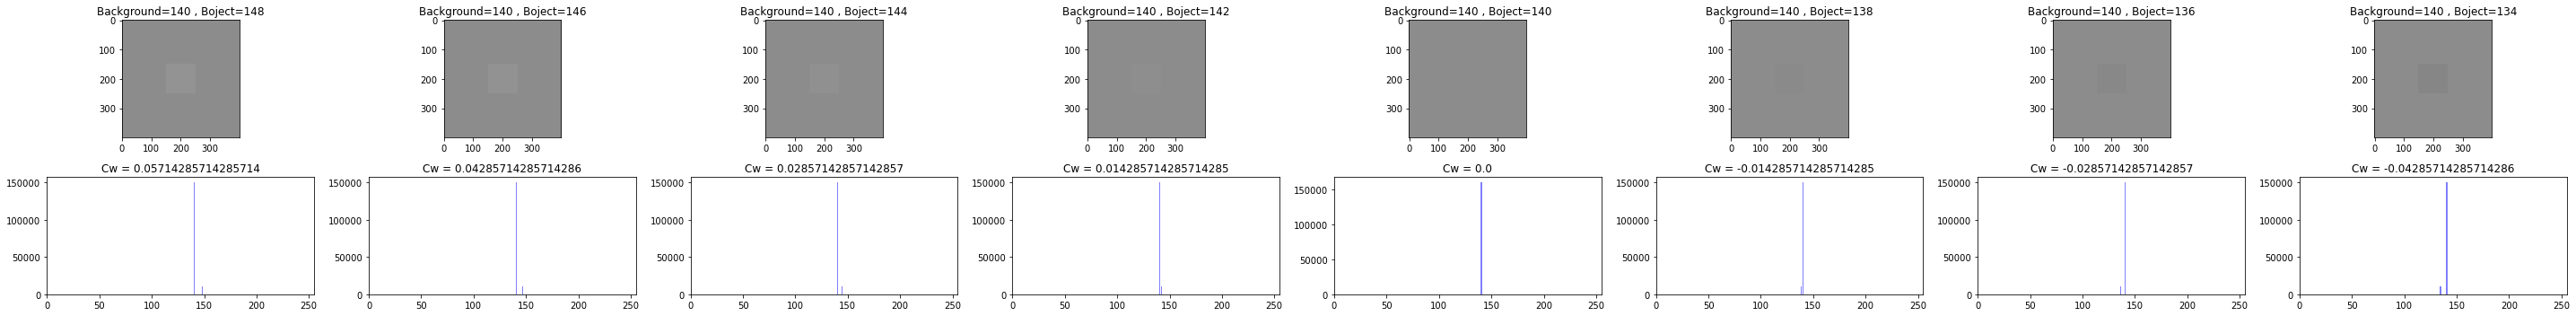

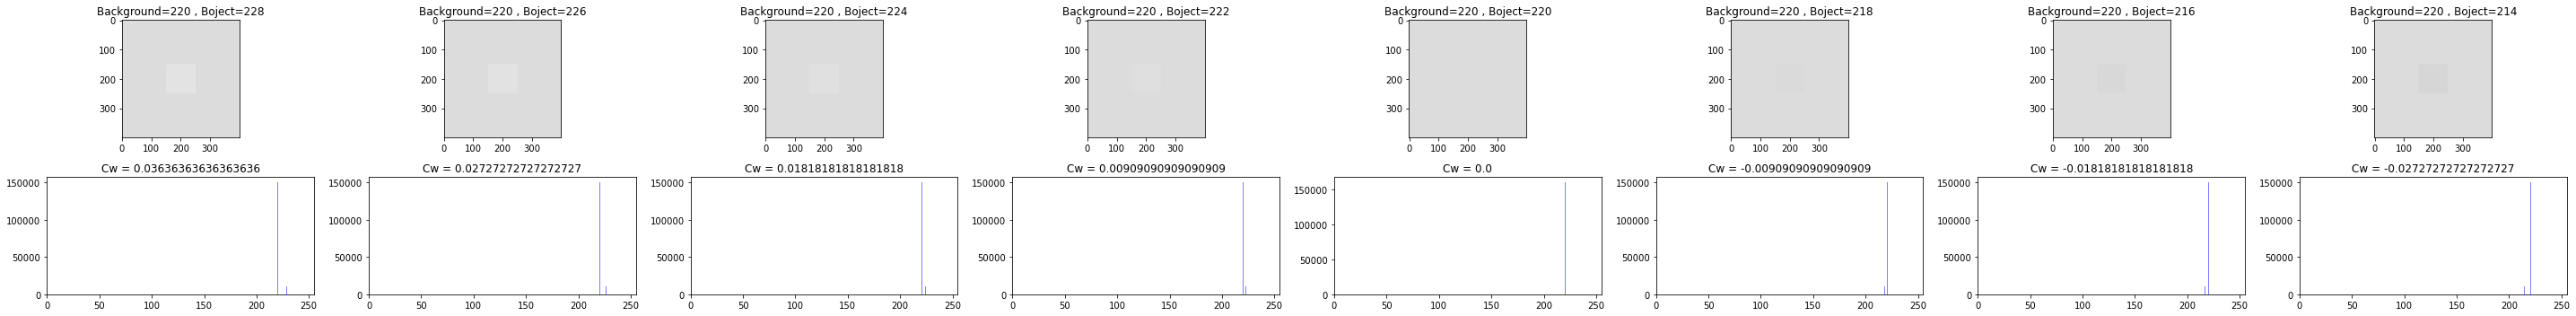

In [2]:
backgrounds = np.array([40,140,220],dtype='uint8')
moving = 2
for background in backgrounds:  
    
    square_img = np.ones((400,400)) * background
    ax,axes = plt.subplots(2,8,figsize=[40,5])
    for j in range (1,9):
        bObject= background+10-j*moving
        square_img[150:250,150:250] = bObject
        axes[0][j-1].imshow(square_img,cmap='gray', vmin=0, vmax=255)
        axes[0][j-1].set_title(f"Background={background} , Boject={bObject}")
        axes[1][j-1].hist(square_img.ravel(), bins = [i for i in range(0,255)], facecolor='blue', alpha=0.5,       stacked=True)
        axes[1][j-1].set_xlim([0,255])
        Cw = ((background+10-j*moving)-background)/background
        axes[1][j-1].set_title(f"Cw = {Cw}")
    plt.tight_layout()
    plt.show()

Graphic repsentation for our results:

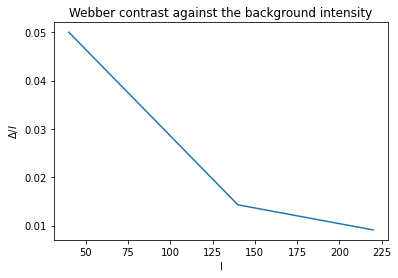

In [3]:
backgroundIntensity=[40, 40 ,140 ,140, 220, 220]
WebberContrast=[0.05, 0.05, 0.014286 ,0.014286, 0.0090909, 0.0090909]
plt.plot(backgroundIntensity,WebberContrast)
plt.title("Webber contrast against the background intensity")
plt.xlabel('I')
plt.ylabel(r"$\Delta/I$")
plt.show()

Graphic representation in a darker room

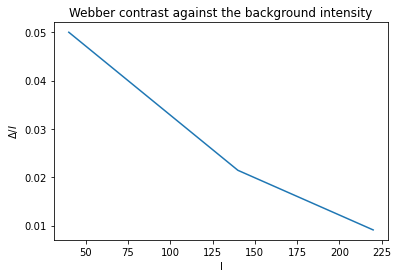

In [4]:
backgroundIntensity=[40, 40 ,140 ,140, 220, 220]
WebberContrast=[0.05 ,0.05 ,0.021429, 0.021429, 0.0090909 ,0.0090909]
plt.plot(backgroundIntensity,WebberContrast)
plt.title("Webber contrast against the background intensity")
plt.xlabel('I')
plt.ylabel(r"$\Delta/I$")
plt.show()

2.1.2

2.3.2.2

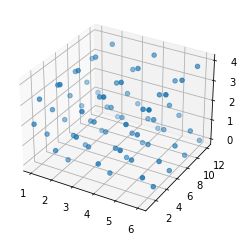

Matrix of x*h 2d 
 [[2 3 1 2 3 1 2 3 1 2 3 1]
 [1 4 0 1 4 0 1 4 0 1 4 0]
 [2 3 1 2 3 1 2 3 1 2 3 1]
 [1 4 0 1 4 0 1 4 0 1 4 0]
 [2 3 1 2 3 1 2 3 1 2 3 1]
 [1 4 0 1 4 0 1 4 0 1 4 0]]


In [5]:
x= np.array([[2,3,1],[1,4,0]])
h = np.zeros((2*np.size(x,0)+1,3*np.size(x,1)+1),dtype='uint8')
h[0::2,0::3] = 1
y = signal.convolve2d(x,h)
xs = np.array([[i]*12 for i in range(1,7)])
ys= np.array([[i for i in range(1,13)]]*6)
fig, ax = plt.subplots(subplot_kw=dict(projection='3d')) 
ax.scatter(xs,ys,y)
plt.show()
print("Matrix of x*h 2d \n",y)

2.3.2.2 
b

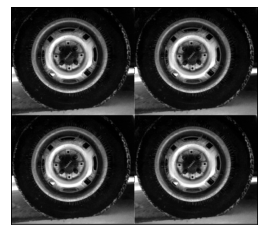

In [6]:
img = np.array(cv.imread('tire.tif',cv.IMREAD_GRAYSCALE),dtype='uint8')
hight , width = np.shape(img)
h = np.zeros((hight,width),dtype='uint8')
h[0,-1]=h[0,0]=h[-1,-1]=h[-1,0] = 1
picture = signal.convolve2d(img,h)
ShowGrayImg(picture)

2.3.2.2 
c

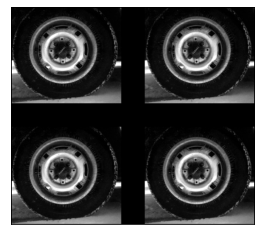

In [7]:
img = np.array(cv.imread('tire.tif',cv.IMREAD_GRAYSCALE),dtype='uint8')
hight , width = np.shape(img)
z=50
h = np.zeros((hight+z,width+z),dtype='uint8')
h[0,-1]=h[0,0]=h[-1,-1]=h[-1,0] = 1
picture = signal.convolve2d(img,h)
ShowGrayImg(picture)